<a href="https://colab.research.google.com/github/FinEckhoff/AI/blob/master/NumberRecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
tf.device('/device:GPU:0')

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [ ]:
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 2ms/step - loss: 0.2685 - accuracy: 0.9241
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1210 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0843 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0635 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0496 - accuracy: 0.9849


In [ ]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0719 - accuracy: 0.9775


[0.07188884913921356, 0.9775000214576721]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

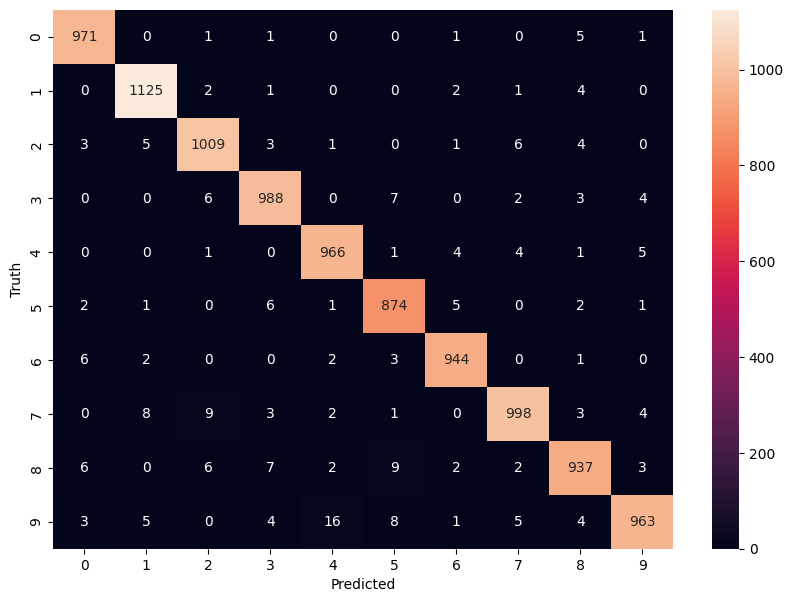

In [ ]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

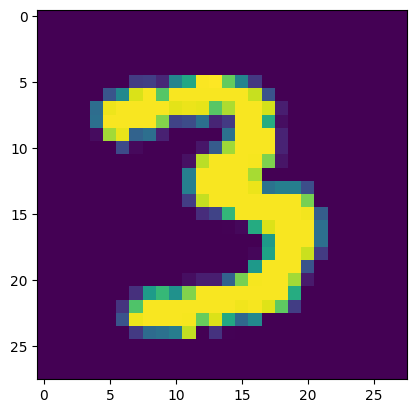

In [ ]:

plt.imshow(x_test[500])

In [ ]:
y_test[500]

3